<h1 align='center'>iPython SQL: the beginning of SQL in iPython (and Jupyter) notebooks</h1>

<h2 align='center'>Catherine Devlin</h2>

<h1 align='center'>How it started</h1>

<h1 align='center'>JupySQL: improving SQL in Jupyter</h1>

<h2 align='center'>Laura Funderburk</h2>

<img src='jupysql.jpeg' width=300px></img>

### Pre requisites

```bash
pip install jupysql duckdb-engine kaggle
```

In [ ]:
%pip install jupysql duckdb-engine kaggle seaborn matplotlib ipywidgets --quiet

### Load extension

In [1]:
%load_ext sql

### Integrations

JupySQL has integrations with the following

- DuckDB
- Pandas
- Polars
- MySQL
- Microsoft SQL Server
- MariaDB
- Clickhouse
- Mindsdb tutorial
- PostgreSQL
- QuestDB

### Initializing a DuckDB instance

In [2]:
%sql duckdb://

### Perform queries - directly from our CSV file!

In [3]:
%%sql
SELECT * FROM organics_cleaned.csv LIMIT 5

*  duckdb://
Done.


Customer_Loyalty_ID,Gender,Geographic_Region,Loyalty_Status,Neigborhood_Cluster-55_Level,Neighborhood_Cluster-7_Level,Television_Region,Affluence_Grade,Age,Frequency,Frequency_Percent,Loyalty_Card_Tenure,Organics_Purchase_Count,Organics_Purchase_Indicator,Total_Spend
140,U,Midlands,Gold,16.0,C,Wales & West,10.0,76.0,1,None,4,0,0,16000.0
620,U,Midlands,Gold,35.0,D,Wales & West,4.0,49.0,1,None,5,0,0,6000.0
868,F,Midlands,Silver,27.0,D,Wales & West,5.0,70.0,1,None,8,1,1,0.02
1120,M,Midlands,Tin,51.0,F,Midlands,10.0,65.0,1,None,7,1,1,0.01
2313,F,Midlands,Tin,4.0,A,Midlands,11.0,68.0,1,None,8,0,0,0.01


### Data profiling 

In [4]:
%sqlcmd profile --table "organics_cleaned.csv"

,Customer_Loyalty_ID,Gender,Geographic_Region,Loyalty_Status,Neigborhood_Cluster-55_Level,Neighborhood_Cluster-7_Level,Television_Region,Affluence_Grade,Age,Frequency,Frequency_Percent,Loyalty_Card_Tenure,Organics_Purchase_Count,Organics_Purchase_Indicator,Total_Spend
unique,18696,3,5,4,,,12,33,62,1,0,39,4,2,2287
top,159522,F,South East,Silver,,,London,8.0,51.0,1,None,5,0,0,0.01
std,15049822.39504687,nan,nan,nan,nan,nan,nan,3.444e+00,1.326e+01,0.0,nan,nan,5.761e-01,4.422e-01,7.463e+03
min,140,F,Midlands,Gold,,,Border,0.0,18.0,1,None,.,0,0,0.01
mean,26018475.649604194,nan,nan,nan,nan,nan,nan,8.763e+00,5.368e+01,1.0,nan,nan,3.166e-01,2.667e-01,4.403e+03
max,52838096,U,South West,Tin,,,Yorkshire,34.0,79.0,1,None,9,3,1,296313.85
freq,1,11509,7525,7205,,,5393,2194,525,18696,0,3681,13710,13710,5506
count,18696,18696,18696,18696,,,18696,17786,17440,18696,0,18696,18696,18696,18696
75%,37342599.0,nan,nan,nan,nan,nan,nan,11.0,64.0,1.0,nan,nan,1.0,1.0,6000.0
50%,28720326.0,nan,nan,nan,nan,nan,nan,8.0,54.0,1.0,nan,nan,0.0,0.0,2000.0


### Interact implementation and parametrization

Pass `--interact` to enable widget

Pass `--save` to save the table for future use

In [5]:
threshold = 0

In [6]:
%%sql --interact threshold --save spend_insights
SELECT Television_Region, COUNT(*) as NUM_Purchases
FROM organics_cleaned.csv
WHERE Organics_Purchase_Indicator = 1
GROUP BY Television_Region
HAVING COUNT(*) >= {{threshold}}

Interactive mode, please interact with below widget(s) to control the variable


interactive(children=(IntSlider(value=0, description='threshold', max=1), Output()), _dom_classes=('widget-int…

### ggplot integration

```
(
    ggplot(table='sql_table_name', mapping=aes(x='table_column_name'))
    +
    geom_func() # geom_histogram or geom_boxplot (required)
    +
    facet_func() # facet_wrap (optional)
)

```

In [7]:
from sql.ggplot import ggplot, aes, geom_boxplot, geom_histogram, facet_wrap

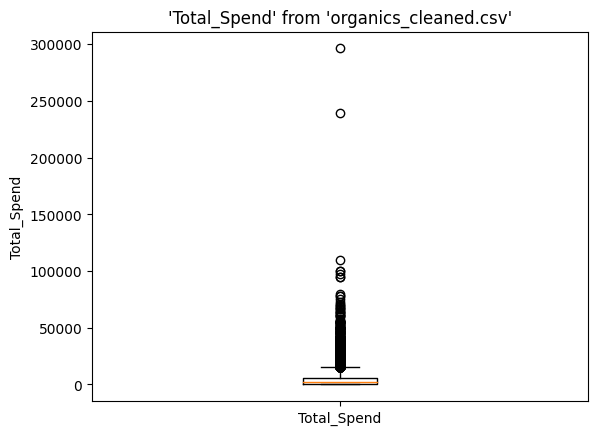

In [8]:
(
    ggplot(table='organics_cleaned.csv', mapping=aes(x='Total_Spend'))
    +
    geom_boxplot()
)

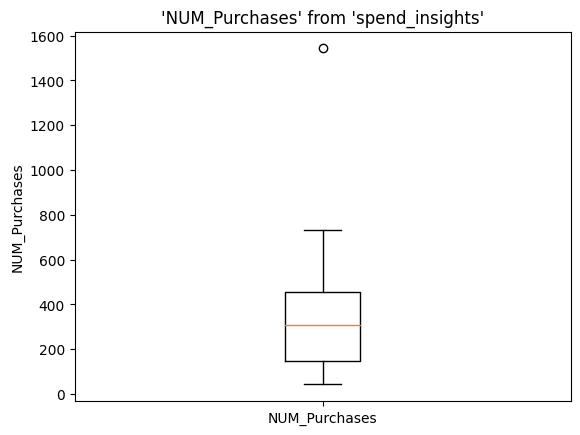

In [9]:
(
    ggplot(table='spend_insights', with_='spend_insights', mapping=aes(x='NUM_Purchases'))
    +
    geom_boxplot()
)


### More widget possibilities through parametrization

In [12]:
from ipywidgets import interact, interact_manual, IntSlider, Dropdown
import seaborn as sns
import matplotlib.pyplot as plt


def get_organics_by_threshold(threshold):
    global organics_by_threshold_df
    query = f"""
    SELECT Television_Region,COUNT(*) as NUM_Purchases
    FROM organics_cleaned.csv
    WHERE Organics_Purchase_Indicator = 1
    GROUP BY Television_Region
    HAVING COUNT(*) >= {threshold}
    """
    print("Performing query")
    # Use JupySQL magic %sql to execute the query
    result = %sql {{query}}
    # Convert the result to a pandas DataFrame
    organics_by_threshold_df = result.DataFrame().sort_values(by='NUM_Purchases')
    display(organics_by_threshold_df)
    fig = sns.barplot(data=organics_by_threshold_df,y='NUM_Purchases',x='Television_Region')
    plt.xticks(rotation=90);
    plt.show()
    

    
# Create a variable for the threshold selection
threshold_w= IntSlider(
    min=0, max=1000, step=100, value=0,
    description='Threshold:',
    disabled=False,
)


In [13]:
# Use ipywidgets.interact_manual to create a dynamic interface
interact_manual(get_organics_by_threshold, threshold=threshold_w);

interactive(children=(IntSlider(value=0, description='Threshold:', max=1000, step=100), Button(description='Ru…